# DATA 410 Lecture 11 - Spring 2022

In [ ]:
# Update the statsmodels package
#!pip install --upgrade Cython
! pip install statsmodels==0.13.2

In [3]:
import statsmodels.api as sm
sm.__version__

'0.13.2'

<font face="Chalkboard" color="darkgreen" size=6.5> Multivariate Models for Regression</font>

## Multivariate Models

In general we want

$$ \mathbb{E}(y|x_1,x_2,..x_p):=F(x_1,x_2,x_3,...x_p)$$

where $F$ represents the model (regressor) we consider.

### Variable Selection

- We want to select only the features that are really important for our model.

- If the functional input-output model is $Y = F(X_1,X_2,X_3,X_4,X_5...X_p)$ then we imagine that it is very possible that only a subset of the variables $X_1,X_2,X_3,X_4,X_5...X_p$ are important and we need to disconsider (eliminate from the model) those that are not relevant.

- Programming and algorithms are based on equations, functions and statement evaluations.

- To represent variable selection in a functional way, we can think of multiplying each variable from the model by a binary weight, a weight of $0$ means the feature is not important and a weight of $1$ means that it is important:

$$
Y = F(w_1\cdot X_1,w_2\cdot X_2,w_3\cdot X_3,w_4\cdot X_4,w_5\cdot X_5...w_p\cdot X_p)
$$

where the weights $w_i$ are either $0$ or $1.$

The vector of binary weights $w=(w_1,w_2,w_3,...w_p)$ gives us what we call the ***sparsity pattern*** for the variable selection.

### Critical Aspects

1. What is the simplest choice for the function $F$?
2. How do we perform variable selection?
3. How do we accomodate nonlinear relationships?

## Variable Selection

In the case of multiple linear regression we have that

$$F(X_1,X_2,...X_p)=\beta_1 X_1+\beta_2 X_2 + ...\beta_p X_p$$

and the sparsity pattern means that a subset of the $\beta_1, \beta_2, ...\beta_p$ are equal to $0.$ 

So we assume 

$$ Y \approx X\cdot \beta +\sigma\epsilon $$

and we want the coefficients $\beta.$ 

The "classical" way of solving is:

$$X^{t}\cdot Y \approx X^{t}X\cdot \beta + \sigma X^{t}\epsilon$$ so we get $$ \mathbb{E}(\beta) = (X^{t}X)^{-1} X^{t}\cdot \mathbb{E}(Y)$$

where $\mathbb{E}(Y)$ denotes the expected value of $Y.$

The questions that we explore are:

 - Why and how we know that we need variable selection.
 
 - How we measure the effects of variable selection on the model.
 
 - How to determine if the method of selecting a sparsity pattern is working in the context of our data. 




Let's assume that we have some data with three features, such as

  Housing Area  |     Value   |    Property Tax  | Sales Price |
 -------------  |    ------   |   -------------  | ----------- |
          1800  |       234   |             9.8  |       267.5
          1980  |       244   |            10.5  |       278.2
          2120  |       252   |            16.2  |       284.5
          2500  |       280   |            18.4  |       310.4


If this is the only data we have for these features do we need to do any variable selection for predicting the sales price with a linear model?



If we try to fit the *Ordinary Least Squares* model (OLS) to determine the best fit what would we do?

```r
X <- matrix(c(1800,1980,2120, 2500, 234,244,252,280,9.8,10.5,16.2,18.4),4,3)
Y <- c(267.5,278.2,284.5,310.4)
model <- lm(Y~X)
model
```

## <font color= 'navy'> What does Rank Deficiency means and why we need Regularization</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviatin of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large
X^tY = X^tX\beta+\sigma X^t\epsilon
$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

###<font color='green'> We can test whether the matrix $X^tX$ is invertible by simply computing its determinant and checking that it is not zero.

###<font color='crimson'> IMPORTANT: When the matrix $X^tX$ is not invertible we cannot apply this method to get $\mathbb{E}(\beta)$. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.</font>


In [ ]:
import numpy as np
import pandas as pd

ex1 = pd.read_csv('drive/MyDrive/Colab Notebooks/dat.csv')

In [ ]:
x  = ex1.iloc[:,0:-1].values
y  = ex1.iloc[:,-1].values

In [ ]:
np.linalg.det(np.matmul(np.transpose(x),x))

-9.648236308181509e-17

In [ ]:
np.matmul(np.matmul(np.transpose(x),x),np.linalg.inv(np.matmul(np.transpose(x),x)))

array([[ 1.05257211e+00, -1.90340909e-02, -2.64717717e-03,
        -1.43378436e-02,  4.32669719e-02,  1.84772727e+00],
       [ 7.60892563e-03,  9.85227273e-01,  2.45992291e-04,
        -3.03785355e-03, -3.76722117e-02,  3.81818182e-01],
       [ 2.38281250e+01, -1.72500000e+01,  1.46557617e+00,
        -6.73632812e+00, -6.47187500e+01, -1.38000000e+02],
       [ 4.63281250e+00,  5.18750000e+01,  9.26513672e-02,
        -3.79882812e-01, -3.17187500e+00,  3.10000000e+01],
       [-1.42137492e-02,  2.40246212e-01, -5.56519177e-05,
        -8.29598982e-02,  1.40209034e+00,  1.92196970e+00],
       [ 3.32031250e-02,  2.18750000e-01,  1.67846680e-03,
        -1.68457031e-02, -4.29687500e-02,  7.50000000e-01]])

## <font color='navy'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IIy5df8JcgHcI8oWxJbze9PiW_cUaIZD' 
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


## <font color= 'navy'> L2 Regularization - Tikhonov 1940's </font>

The L2 norm is 

$$
\|\beta\|_2:=\sqrt{\sum_{j=1}^{p}\beta_j^2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

The hyperparameter $\alpha$ is becoming a "tunning" parameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L1 Regularization as known as Lasso (Tibshirani, 1993) </font>

The L1 norm is 

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

##<font color='navy'> Geometric comparison in 2D between L1 and L2 norms

<figure>
<center>
<img src='https://drive.google.com/uc?id=13uBQRlI_-LNfA8yLphY3fHChoEbjqOEW' 
width='500px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


##<font color= 'navy'> Elastic Net Regularization (2005) </font>

Tha main idea is to combine the L2 and L1 regularizations in a *convex* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$, $\alpha$ is formulated via the ratio between the two penalties such as $\text{l1_ratio}=\frac{\lambda}{1-\lambda}$

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this rgularization approach we have two hyperparameters that we need to decide on.

## Critical Thinking: When do we know we should use regularization:

- when we have to learn more weights than the number of independent observations (this is the case in deep learning).
- when we have strong multiple correlations among the input features (if the correlation between two features is very strong then we get a rank defficient case - please, for fun see https://www.tylervigen.com/spurious-correlations


In [ ]:
# imports
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

In [ ]:
lr = Ridge(alpha=0.01)


In [ ]:
# we got the regularized coeffiecients by Ridge regression
lr.coef_

array([[ 0.05499038, -0.0880771 ,  0.03861881,  0.4372389 , -0.47123514]])

In [ ]:
# general imports
from math import ceil
from scipy import linalg
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Boston Housing Prices.csv')
df

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.986000,42.231201,0.06263,0.0,11.93,no,0.573,6.593,69.099998,2.4786,1,273,21.000000,9.67,22.400000
502,Winthrop,1802,-70.990997,42.227501,0.04527,0.0,11.93,no,0.573,6.120,76.699997,2.2875,1,273,21.000000,9.08,20.600000
503,Winthrop,1803,-70.994797,42.226002,0.06076,0.0,11.93,no,0.573,6.976,91.000000,2.1675,1,273,21.000000,5.64,23.900000
504,Winthrop,1804,-70.987503,42.223999,0.10959,0.0,11.93,no,0.573,6.794,89.300003,2.3889,1,273,21.000000,6.48,22.000000


Extract the features we want (specifying them without any criteria is not optimal)

In [ ]:
features = ['crime','rooms','residential','industrial','nox','older','distance','highway','tax','ptratio','lstat']
X = np.array(df[features])
y = np.array(df['cmedv']).reshape(-1,1)
dat = np.concatenate([X,y], axis=1)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split as tts
dat_train, dat_test = tts(dat, test_size=0.3, random_state=1234)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(dat_train[:,:-1],dat_train[:,-1])
yhat_lm = lm.predict(dat_test[:,:-1])
mae_lm = mean_absolute_error(dat_test[:,-1], yhat_lm)
print("MAE Linear Model = ${:,.2f}".format(1000*mae_lm))

MAE Linear Model = $3,640.02


### Critical Thinking Question: Is this the best we can do with a linear model?

In [ ]:
lr = Ridge(alpha=1)

In [ ]:
lr.fit(dat_train[:,:-1],dat_train[:,-1])
yhat_lr = lr.predict(dat_test[:,:-1])
mae_lr = mean_absolute_error(dat_test[:,-1], yhat_lr)
print("MAE Linear Model = ${:,.2f}".format(1000*mae_lr))

MAE Linear Model = $3,600.77


In [ ]:
ls = Lasso(alpha=0.1)

In [ ]:
ls = Lasso(alpha=0.01)
ls.fit(dat_train[:,:-1],dat_train[:,-1])
yhat_ls = ls.predict(dat_test[:,:-1])
mae_ls = mean_absolute_error(dat_test[:,-1], yhat_ls)
print("MAE Linear Model = ${:,.2f}".format(1000*mae_ls))

MAE Linear Model = $3,619.90


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
# we apply the scaling only for the input features

In [ ]:
lr = Ridge(alpha=45)
lr.fit(scale.fit_transform(dat_train[:,:-1]),dat_train[:,-1])
yhat_lr = lr.predict(scale.transform(dat_test[:,:-1]))
mae_lr = mean_absolute_error(dat_test[:,-1], yhat_lr)
print("MAE Linear Model = ${:,.2f}".format(1000*mae_lr))

MAE Linear Model = $3,443.23


In [ ]:
maelr = []
for i in range(100):
  lr = Ridge(alpha=i)
  lr.fit(scale.fit_transform(dat_train[:,:-1]),dat_train[:,-1])
  yhat_lr = lr.predict(scale.transform(dat_test[:,:-1]))
  maelr.append(mean_absolute_error(dat_test[:,-1], yhat_lr))

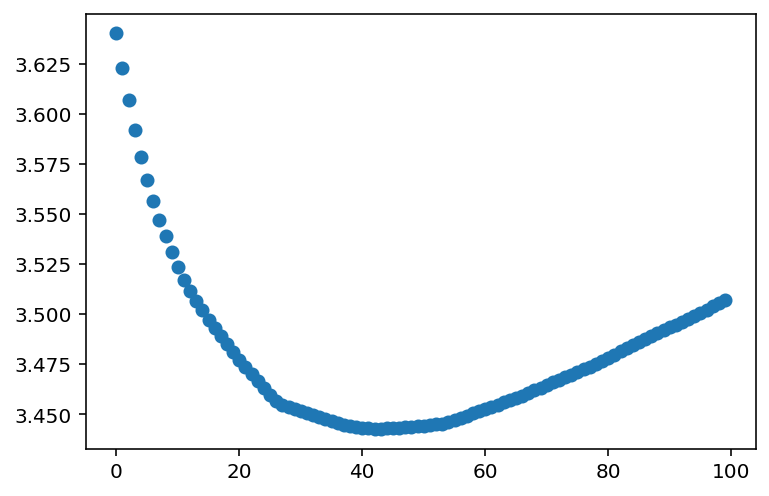

In [ ]:
plt.scatter(range(100),maelr)

In [ ]:
ls = Lasso(alpha=0.16)
ls.fit(scale.fit_transform(dat_train[:,:-1]),dat_train[:,-1])
yhat_ls = ls.predict(scale.transform(dat_test[:,:-1]))
mae_ls = mean_absolute_error(dat_test[:,-1], yhat_ls)
print("MAE Lasso Model = ${:,.2f}".format(1000*mae_ls))

MAE Lasso Model = $3,499.16


In [ ]:
v = np.arange(0,1,0.01)

In [ ]:
v.shape

(100,)

In [ ]:
maels = []
for i in range(100):
  ls = Lasso(alpha=v[i])
  ls.fit(scale.fit_transform(dat_train[:,:-1]),dat_train[:,-1])
  yhat_ls = ls.predict(scale.transform(dat_test[:,:-1]))
  maels.append(mean_absolute_error(dat_test[:,-1], yhat_ls))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3985.74252840827, tolerance: 2.85630598265659
  positive)


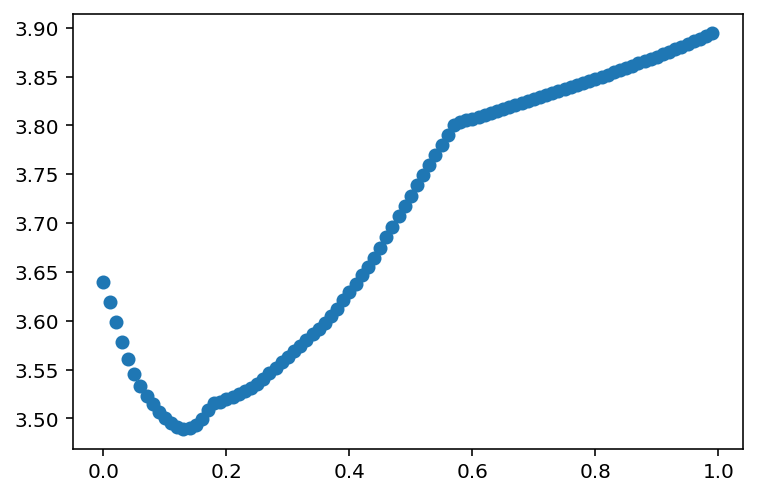

In [ ]:
plt.scatter(v,maels)

In [ ]:
# here the best value we found for alpha and Lasso regularization is
v[np.argmin(maels)]

0.13

In [ ]:
1000*maels[np.argmin(maels)]

3489.259243584383

### Exercise try Elastic Net

## Polynomial Features

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 150

6.443967644634603
0.9075020945627927


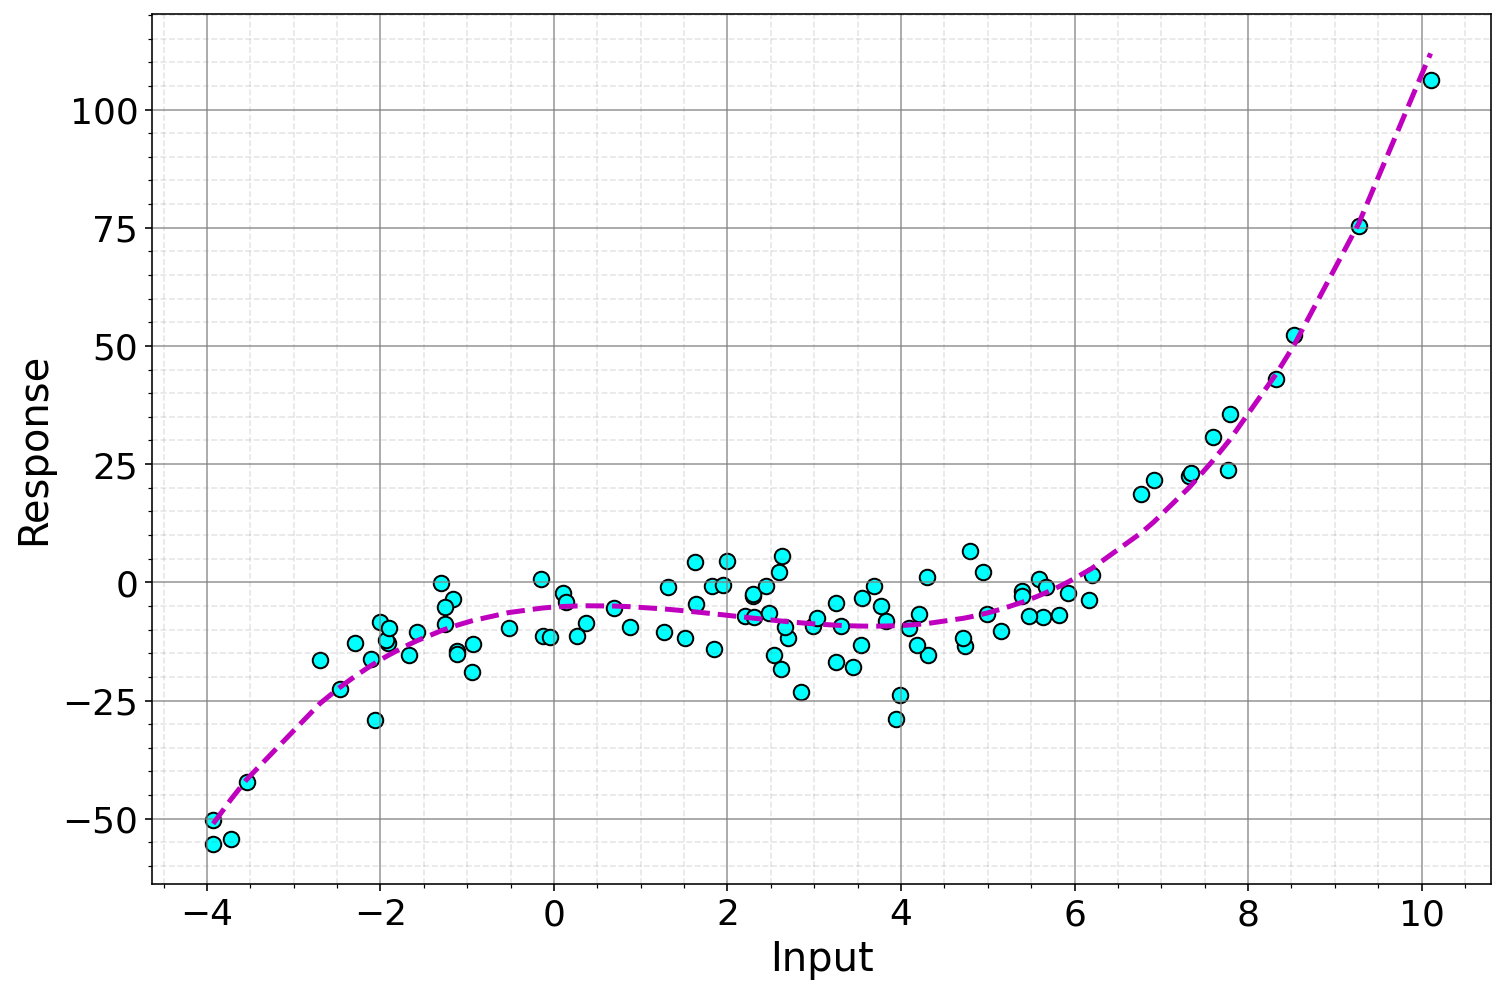

In [ ]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100)

def f(x):
    sz = len(x)
    return x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 2 * np.random.normal(-3, 3, sz)

y = f(x)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x.reshape((-1,1)))

# the model created is linear in weights 
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, y, color='cyan',edgecolors='k',s=60)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
ax.plot(x, y_poly_pred, color='m',linestyle='--',lw=2.5)
ax.set_xlabel('Input',fontsize=20)
ax.set_ylabel('Response',fontsize=20)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.tick_params(axis='x', colors='black',labelsize=18)
plt.tick_params(axis='y', colors='black',labelsize=18)
ax.minorticks_on()
plt.show()

### Now we want to create polynomial features for our real data and try regularized regression

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_poly_train, x_poly_test, y_train, y_test = tts(x_poly,y, test_size=0.3, random_state=1234)

In [ ]:
lr.fit(polynomial_features.fit_transform(dat_train[:,:-1]),dat_train[:,-1])
yhat_lp = lr.predict(polynomial_features.fit_transform(dat_test[:,:-1]))
mae_lp = mean_absolute_error(dat_test[:,-1], yhat_lp)
print("MAE Polynomial Model = ${:,.2f}".format(1000*mae_lp))

MAE Polynomial Model = $2,546.22


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166.1606989099148, tolerance: 2.85630598265659
  positive)


## Neural Network Approach

In [ ]:
# imports for creating a Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
dat_train[:,:-1].shape

(354, 11)

In [ ]:
# Create a Neural Network model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=11))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=800)

# Fit the model
history = model.fit(dat_train[:,:-1], dat_train[:,11], validation_split=0.3, epochs=1000, batch_size=100, verbose=0, callbacks=[es])

# Calculate predictions
#yhat_nn = model.predict(X_test)

## Here are the predictions we made for the test data:

In [ ]:
from sklearn.metrics import mean_absolute_error

yhat_nn = model.predict(dat_test[:,:-1])
mae_nn = mean_absolute_error(dat_test[:,-1], yhat_nn)
print("MAE Neural Network = ${:,.2f}".format(1000*mae_nn))

MAE Neural Network = $2,661.53


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1693)

In [ ]:
#%%timeit -n 1

mae_nn = []

for idxtrain, idxtest in kf.split(dat):
  X_train = dat[idxtrain,0:-1]
  y_train = dat[idxtrain,-1]
  X_test  = dat[idxtest,0:-1]
  y_test = dat[idxtest,-1]
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=800)
  model.fit(X_train,y_train,validation_split=0.3, epochs=1000, batch_size=100, verbose=0, callbacks=[es])
  yhat_nn = model.predict(X_test)
  mae_nn.append(mean_absolute_error(y_test, yhat_nn))
print("Validated MAE Neural Network Regression = ${:,.2f}".format(1000*np.mean(mae_nn)))

Epoch 00846: early stopping
Epoch 00803: early stopping
Epoch 00844: early stopping
Epoch 00872: early stopping
Epoch 00866: early stopping
Epoch 00899: early stopping
Epoch 00805: early stopping
Epoch 00966: early stopping
Epoch 00910: early stopping
Validated MAE Neural Network Regression = $4,331.03


## XGBoost

The method is related to Random Forest

https://towardsdatascience.com/xgboost-python-example-42777d01001e

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=100,reg_lambda=1,alpha=1,gamma=1,max_depth=10)

In [ ]:
%%timeit -n 1

mae_xgb = []

for idxtrain, idxtest in kf.split(dat):
  X_train = dat[idxtrain,0:-1]
  y_train = dat[idxtrain,-1]
  X_test  = dat[idxtest,0:-1]
  y_test = dat[idxtest,-1]
  model_xgb.fit(X_train,y_train)
  yhat_xgb = model_xgb.predict(X_test)
  mae_xgb.append(mean_absolute_error(y_test, yhat_xgb))
print("Validated MAE XGBoost Regression = ${:,.2f}".format(1000*np.mean(mae_xgb)))

Validated MAE XGBoost Regression = $2,026.92
Validated MAE XGBoost Regression = $2,026.92
Validated MAE XGBoost Regression = $2,026.92
1 loop, best of 3: 1.26 s per loop


## Using Kernel Regression from StatsModels

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg


model_KernReg = KernelReg(endog=dat_train[:,-1],exog=dat_train[:,:-1],var_type='ccccccccccc',ckertype='gaussian')

In [ ]:
dat_train[:,-1].reshape(-1,1).shape

(354, 1)

In [ ]:
yhat_sm_test, y_std = model_KernReg.fit(dat_test[:,:-1])

In [ ]:
mae_sm = mean_absolute_error(dat_test[:,-1], yhat_sm_test)
print("MAE StatsModels Kernel Regression = ${:,.2f}".format(1000*mae_sm))

MAE StatsModels Kernel Regression = $2,854.57
